<a href="https://colab.research.google.com/github/hbrown227/BiologistScripts/blob/master/Chlamydia_Clustering_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install dependences and call googlesheet

In [ ]:
from gc import get_freeze_count
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yellowbrick.cluster
import sklearn

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

from matplotlib import font_manager
from google.auth.credentials import Credentials
%matplotlib inline
plt.style.use('seaborn-whitegrid')
font_manager.FontManager({'font.sans-serif':'Arial'})


from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

Open worksheet and covert to dataframe then array

In [ ]:

worksheet = gc.open('2230hpi').sheet1

df= pd.DataFrame(worksheet.get_all_records())

print(df.head)



<bound method NDFrame.head of              euo        hctB     Volume  Time  Class
0      46.033411   83.788656   2.685625    22      0
1     361.613976   62.051317  32.748746    22      0
2     301.440280   58.918156  44.353950    22      0
3      59.225418   85.447794  12.333054    22      0
4      59.829097   73.768170  13.403091    22      0
...          ...         ...        ...   ...    ...
1728   43.249178  103.149089   8.620117    18      0
1729   57.526452   80.337275  10.086363    18      0
1730   43.507248  107.636782   6.761288    18      0
1731   46.229740  113.835541  15.631587    18      0
1732   46.593496   90.078821  10.058758    18      0

[1733 rows x 5 columns]>


DBscan

In [ ]:
from sklearn.cluster import DBSCAN

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

clustering

fit(X, y=None, sample_weight=None)

NameError: ignored

Elbow Method for KMeans

MinMaxScaler()
[2141.698589 9528.141199]
[[0.01843242 0.00694396]
 [0.16624404 0.00465832]
 [0.13805988 0.00432887]
 ...
 [0.01724922 0.00945155]
 [0.01852438 0.01010334]
 [0.01869476 0.00760536]]


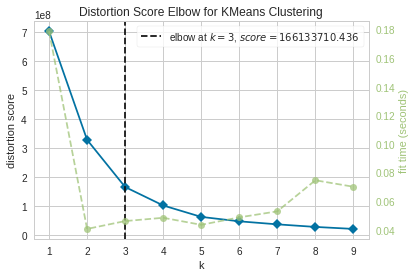

3

In [ ]:


# define min max scaler
## need to normalize data in order to not have outsized effect by one of the parameters
scaler = MinMaxScaler()

print(scaler.fit(df[['euo','hctB']]))

print(scaler.data_max_)

print(scaler.transform(df[['euo','hctB']]))


model= KMeans()
visualizer = KElbowVisualizer (model, k=(1,10))
visualizer.fit(df)
visualizer.show()
visualizer.elbow_value_


Bisect

In [ ]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(df)
clustering.labels_

clustering



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


KeyboardInterrupt: ignored

In [ ]:

k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(df[['euo','hctB','Volume']])
print(y)
pd.DataFrame(y).to_csv("classified.csv")
from google.colab import files
files.download("classified.csv")


[0 0 0 ... 0 0 0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualize

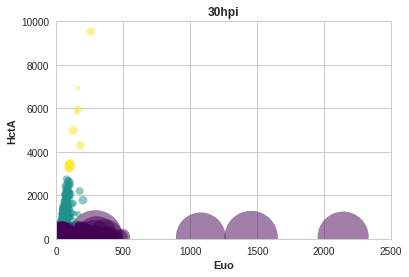

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

HctA = worksheet.col_values(2)
HctA.pop(0)
#[float(i) for i in HctB]
HctA = np.array(HctA, dtype=np.float32)


#gene2
Euo = worksheet.col_values(1)
Euo.pop(0)
#[float(i) for i in Euo]
Euo = np.array(Euo,dtype=np.float32)


#volume
size = worksheet.col_values(3)
size.pop(0)

#[float(i) for i in size]
size = np.array(size, dtype=np.float32)
size = 40 * size

#make graph 
##x=Euo, y=HctB, s=size, c=y (kmeans cluster), cmap=what colors to use, alpha=transperancy
plt.scatter(Euo, HctA, s=size, c=y, cmap='viridis', alpha=0.5,)
plt.axis(xmin=0,xmax=2500,ymin=0, ymax=10000)
plt.xlabel('Euo',fontweight ="bold")
plt.ylabel('HctA',fontweight ="bold")
plt.title('30hpi',fontweight ="bold")

from google.colab import files
plt.savefig('30hpi.pdf')
plt.show()
files.download('30hpi.pdf') 


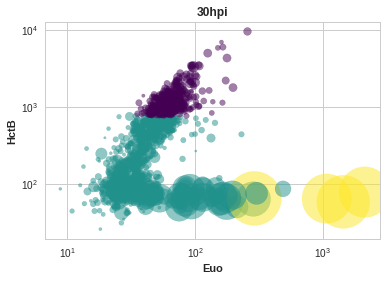

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.scatter(Euo, HctB, s=size, c=y, cmap='viridis', alpha=0.5,)

plt.xscale("log")
plt.yscale("log")

plt.xlabel('Euo',fontweight ="bold")
plt.ylabel('HctB',fontweight ="bold")
plt.title('30hpi',fontweight ="bold")

plt.savefig('30hpi_log.pdf')
plt.show()
files.download('30hpi_log.pdf') 
